In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import os
%matplotlib inline

In [65]:
#now cropping faces
face = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
def crop_faces(img):
    img=cv2.imread(img)
    u,value = np.unique(img,return_counts=True)
    if  value.size >=10:   
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face.detectMultiScale(gray,1.3,1)
        for (x,y,w,h) in faces:
            r_gray=gray[y:y+h,x:x+w]
            r_color=img[y:y+h,x:x+w]
            eyes = eye.detectMultiScale(gray,1.3,1)
            if len(eyes) >=2:
                return r_color
    

In [66]:
#scanning dataset folders for images and directories
folders = []
cropped_folders=[]
dic = {}
for i in os.scandir("politicians_dataset/"):
    folders.append((i.path)+"/")
    dic[(i.path).split('/')[1]] = []
    os.mkdir(i.path.split('/')[-2]+"/cropped_"+i.path.split('/')[-1])
    cropped_folders.append(i.path.split('/')[-2]+"/cropped_"+i.path.split('/')[-1])
print(cropped_folders[0])   

politicians_dataset/cropped_asif_ali_zardari


In [79]:
count=0
img_name=0
for dr in folders:
    for file in os.scandir(dr):
        r_color = crop_faces(dr+file.path.split('/')[-1])
        np.reshape(r_color, (-1,1))
        u, count_unique = np.unique(r_color, return_counts =True)
        if count_unique.size> 10:
            print(cropped_folders[count]+"/")
            cv2.imwrite(cropped_folders[count]+f"/{img_name}.jpg",r_color)
            img_name=img_name+1
    count=count+1        

politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politicians_dataset/cropped_fazal_ur_rehman/
politician

In [83]:
def waveletTransform(img,mode='haar',level=1):
    gray = img
    gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    gray /=255
    
    #coefficients
    coef = pywt.wavedec2(gray,mode,level=level)
    #converting to list
    coef_l = list(coef)
    coef_l[0]*=0
    
    #rebuilding
    coef_l = pywt.waverec2(coef_l,mode)
    coef_l *=255
    coef_l = np.uint8(coef_l)
    return coef_l
    
    

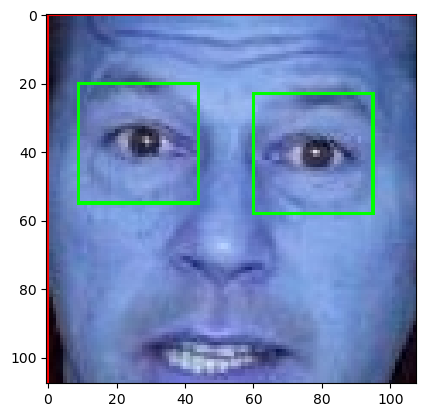

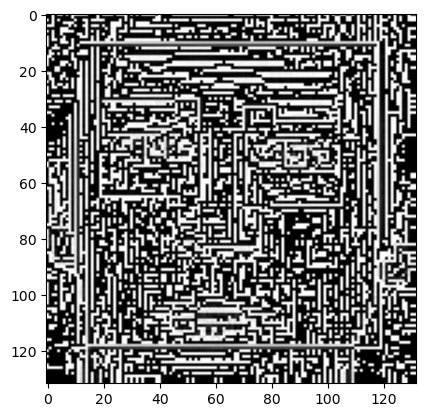

In [104]:
#read image to check wavelet transform
img = cv2.imread("politicians_dataset/cropped_imran_khan/19.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face.detectMultiScale(gray,1.3,5)
for (x,y,w,h) in faces:
    recimg = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = recimg[y:y+h,x:x+w]
    eyes = eye.detectMultiScale(roi_gray,1.3,2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
output = waveletTransform(img)
plt.imshow(roi_color)
plt.show()
plt.imshow(output,cmap='gray')
plt.show()

In [140]:
#preparing for dataset features x and y
#getting politician names
politician_name={}
count =0
for i in cropped_folders:
    politician_name[i.split('/')[-1]]=count
    count+=1
politician_name  


{'cropped_asif_ali_zardari': 0,
 'cropped_fazal_ur_rehman': 1,
 'cropped_imran_khan': 2,
 'cropped_khadim_hussain_rizvi': 3,
 'cropped_nawaz_sharif': 4}

In [121]:
cropped_folders

['politicians_dataset/cropped_asif_ali_zardari',
 'politicians_dataset/cropped_fazal_ur_rehman',
 'politicians_dataset/cropped_imran_khan',
 'politicians_dataset/cropped_khadim_hussain_rizvi',
 'politicians_dataset/cropped_nawaz_sharif']

In [138]:
files = {
    'cropped_asif_ali_zardari':[],
    'cropped_fazal_ur_rehman':[],
    'cropped_imran_khan':[],
    'cropped_khadim_hussain_rizvi':[],
    'cropped_nawaz_sharif':[]
}
count =0
for i in cropped_folders:
    for j in os.scandir(i+'/'):
        files[i.split('/')[-1]].append(j.path)
        count+=1
count    

146

In [141]:
x, y = [], []
for celebrity_name, training_files in files.items():
    for training_image in training_files:
        img = cv2.imread(str(training_image))
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = waveletTransform(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(politician_name[celebrity_name])

C:\Users\Sico\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [148]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(146, 4096)

In [145]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [149]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8648648648648649

In [150]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}
scores=[]
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    

C:\Users\Sico\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sico\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sico\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [151]:
best_estimators['svm'].score(X_test,y_test)

0.8378378378378378

In [154]:
best_estimators['random_forest'].score(X_test,y_test)

0.8648648648648649

In [156]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7567567567567568

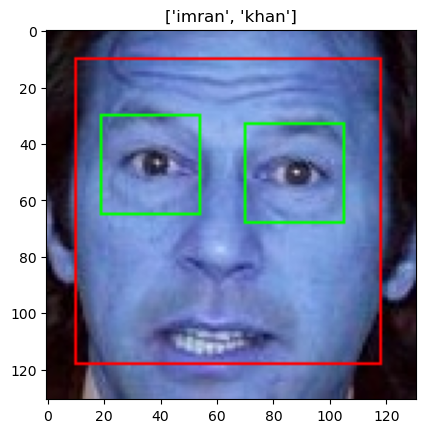

In [160]:
img = cv2.imread('politicians_dataset/cropped_imran_khan/19.jpg')
scalled_raw_img = cv2.resize(img, (32, 32))
img_har = waveletTransform(img,'db1',5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
xx = np.array(combined_img).reshape(1,4096).astype(float)
value = best_estimators['random_forest'].predict(xx)
for i,v in politician_name.items():
    if v == value:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            recimg = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = recimg[y:y+h,x:x+w]
            eyes = eye.detectMultiScale(roi_gray,1.3,2)
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        plt.imshow(img)
        plt.title(i.split('_')[1:3])
        plt.show()
        